In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from plotnine import * 
import os
import scipy
import matplotlib.pyplot as plt
import researchpy as rp
import seaborn as sns
import datetime
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [2]:
from IPython.core.display import HTML # to pretty print pandas df and be able to copy them over (e.g. to ppt slides)

In [3]:
# Loading the CSV file into a pandas DataFrame
movie_df = pd.read_excel(r'c:\Users\leath\Documents\AUAS\0. Completed\7. AI Methods in Business\Resit\metaClean43Brightspace.xlsx')

# Printing the DataFrame
print(movie_df)

                                                     url  \
0      https://www.metacritic.com/movie/!women-art-re...   
1      https://www.metacritic.com/movie/10-cloverfiel...   
2      https://www.metacritic.com/movie/10-items-or-less   
3              https://www.metacritic.com/movie/10-years   
4      https://www.metacritic.com/movie/100-bloody-acres   
...                                                  ...   
11359       https://www.metacritic.com/movie/zoolander-2   
11360              https://www.metacritic.com/movie/zoom   
11361         https://www.metacritic.com/movie/zoom-2016   
11362          https://www.metacritic.com/movie/zootopia   
11363            https://www.metacritic.com/movie/zus-zo   

                       title                               studio  \
0      !Women Art Revolution                  Hotwire Productions   
1        10 Cloverfield Lane                   Paramount Pictures   
2           10 Items or Less                           Click Star   
3  

# 1. Cleaning & EDA

In [4]:
# Checking the first few rows of the dataframe
movie_df.head()

,url,title,studio,rating,runtime,cast,director,genre,summary,awards,metascore,userscore,RelDate
0,https://www.metacritic.com/movie/!women-art-re...,!Women Art Revolution,Hotwire Productions,| Not Rated,83.0,NaN,Lynn Hershman-Leeson,Documentary,NaN,NaN,70,NaN,2011-06-01
1,https://www.metacritic.com/movie/10-cloverfiel...,10 Cloverfield Lane,Paramount Pictures,| PG-13,104.0,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror","Waking up from a car accident, a young woman (...","#18MostDiscussedMovieof2016 , #1MostSharedMovi...",76,7.7,2016-03-11
2,https://www.metacritic.com/movie/10-items-or-less,10 Items or Less,Click Star,| R,82.0,"Jonah Hill,Morgan Freeman,Paz Vega",Brad Silberling,"Drama,Comedy,Romance",While researching a role as a supermarket mana...,NaN,54,5.8,2006-12-01
3,https://www.metacritic.com/movie/10-years,10 Years,Anchor Bay Entertainment,| R,100.0,"Channing Tatum,Chris Pratt,Jenna Dewan",Jamie Linden,"Drama,Comedy,Romance",NaN,NaN,61,6.9,2012-09-14
4,https://www.metacritic.com/movie/100-bloody-acres,100 Bloody Acres,Music Box Films,| Not Rated,91.0,NaN,Cameron Cairnes,"Horror,Comedy",Reg and Lindsay run an organic fertilizer busi...,NaN,63,7.5,2013-06-28


In [5]:
# Checking the last few rows of the dataframe
movie_df.tail()

,url,title,studio,rating,runtime,cast,director,genre,summary,awards,metascore,userscore,RelDate
11359,https://www.metacritic.com/movie/zoolander-2,Zoolander 2,Paramount Pictures,| PG-13,102.0,"Ben Stiller,Kristen Wiig,Owen Wilson,PenÃ©lope...",Ben Stiller,Comedy,Derek (Ben Stiller) and Hansel (Owen Wilson) a...,"#87MostDiscussedMovieof2016 , #80MostSharedMov...",34,4.1,2016-02-12
11360,https://www.metacritic.com/movie/zoom,Zoom,Columbia Pictures,| PG,83.0,"Chevy Chase,Courteney Cox,Tim Allen",Peter Hewitt,"Action,Adventure,Sci-Fi,Family",A former superhero (Allen) is called back into...,NaN,26,4.4,2006-08-11
11361,https://www.metacritic.com/movie/zoom-2016,Zoom,Screen Media Films,| Not Rated,96.0,NaN,Pedro Morelli,"Drama,Comedy,Animation",A multi-dimensional interface between a comic ...,NaN,55,5.7,2016-09-02
11362,https://www.metacritic.com/movie/zootopia,Zootopia,Walt Disney Studios Motion Pictures,| PG,108.0,NaN,Byron Howard,"Action,Adventure,Comedy,Crime,Animation,Family",NaN,"#80BestMovieof2016 , #11MostDiscussedMovieof20...",78,8.6,2016-03-04
11363,https://www.metacritic.com/movie/zus-zo,Zus & zo,Lifesize Entertainment,NaN,106.0,NaN,Paula van der Oest,"Fantasy,Comedy,Romance",A quirky romantic comedy about 3 sisters who c...,NaN,50,7.2,2003-02-07


In [6]:
print("There are {} rows and {} columns in the dataset".format(movie_df.shape[0], movie_df.shape[1]))

There are 11364 rows and 13 columns in the dataset


In [7]:
# Defining the "movie_df" dataframe with only needed for the research question and subquestions columns
movie_df = movie_df[['title', 'studio', 'rating', 'cast', 'director',
       'genre', 'metascore', 'userscore', 'RelDate']]

In [8]:
# Checking for duplicates
duplicates = movie_df.duplicated().sum()
print(f"There are {duplicates} duplicates in this dataset")

There are 0 duplicates in this dataset


In [9]:
# Removing an "|" from the "rating" column
movie_df['rating'] = movie_df['rating'].str.lstrip("|") 
movie_df.head()

,title,studio,rating,cast,director,genre,metascore,userscore,RelDate
0,!Women Art Revolution,Hotwire Productions,Not Rated,NaN,Lynn Hershman-Leeson,Documentary,70,NaN,2011-06-01
1,10 Cloverfield Lane,Paramount Pictures,PG-13,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror",76,7.7,2016-03-11
2,10 Items or Less,Click Star,R,"Jonah Hill,Morgan Freeman,Paz Vega",Brad Silberling,"Drama,Comedy,Romance",54,5.8,2006-12-01
3,10 Years,Anchor Bay Entertainment,R,"Channing Tatum,Chris Pratt,Jenna Dewan",Jamie Linden,"Drama,Comedy,Romance",61,6.9,2012-09-14
4,100 Bloody Acres,Music Box Films,Not Rated,NaN,Cameron Cairnes,"Horror,Comedy",63,7.5,2013-06-28


In [10]:
# Check data types of columns in the DataFrame
data_types = movie_df.dtypes

print("Data types of columns:")
print(data_types)

Data types of columns:
title                object
studio               object
rating               object
cast                 object
director             object
genre                object
metascore             int64
userscore           float64
RelDate      datetime64[ns]
dtype: object


In [11]:
# Checking for NaN values
movie_df.isnull().sum()

title           0
studio        350
rating       1067
cast         3702
director       14
genre          20
metascore       0
userscore    2105
RelDate         0
dtype: int64

## 1.1 Filling missing values

The missing values of categorical variables studio, cast, director and genre will be replaced with "Unknown" as it doesn´t make sense to replace them with median as that would change the data too much.

In [12]:
# Filling the missing object values by creating a dictionary and defining the new object values
movie_df = movie_df.fillna({'studio': 'Unknown',
                               'cast': 'Unknown', 
                               'director': 'Unknown',
                               'genre': 'Unknown'})

In order to fill the missing values of the categorical variable "rating", the values will be replaced by numerical values to impute missing values with KNN.

c:\Users\leath\anaconda3\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\leath\anaconda3\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


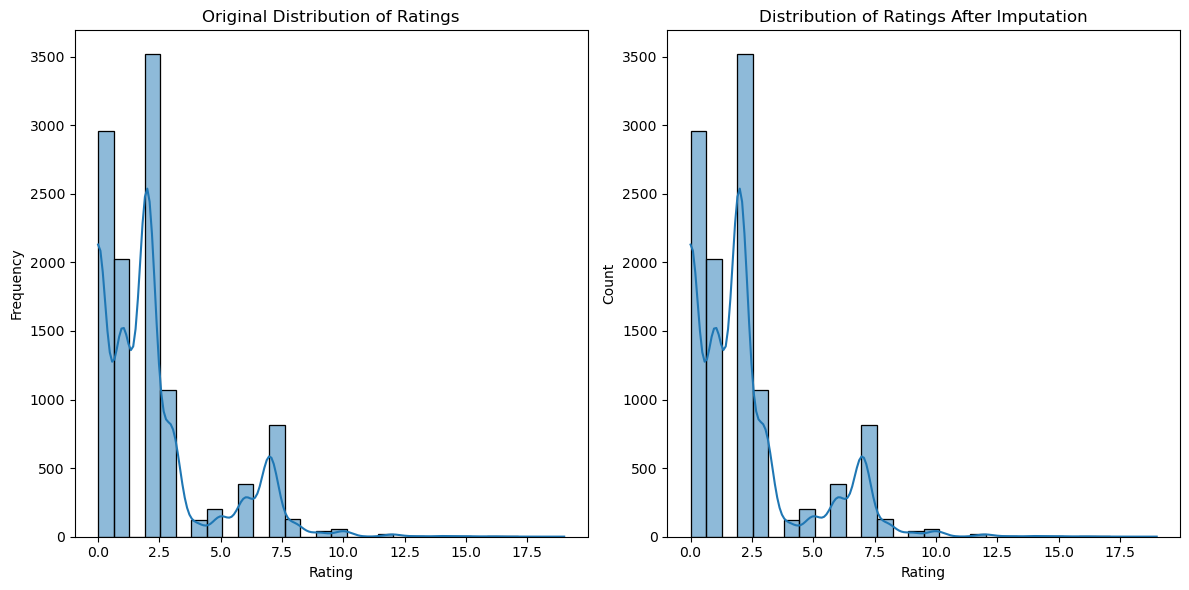

In [13]:
from sklearn.impute import KNNImputer

# Encoding categorical values to ordinal numerical values
# Extracting the 'rating' column
ratings = movie_df['rating'].astype(str)  # Convert to string in case there are non-string values

# Create a mapping dictionary to map unique ratings to ordinal values
unique_ratings = ratings.unique()
rating_mapping = {rating: i for i, rating in enumerate(unique_ratings)}

# Replace the 'rating' values with their corresponding ordinal values
movie_df['rating'] = ratings.map(rating_mapping)

# Original data before filling missing values
original_data = movie_df['rating']

# Extract the column you want to impute
column_to_impute = 'rating'
column_data = movie_df[[column_to_impute]]

# Instantiate the KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)

# Impute NaN values using KNN for the selected column
column_imputed = pd.DataFrame(knn_imputer.fit_transform(column_data), columns=[column_to_impute])

# Replace the original column with the imputed values
movie_df[column_to_impute] = column_imputed[column_to_impute]

# Data after filling missing values
imputed_data = movie_df['rating']

# Setting up the plot
plt.figure(figsize=(12, 6))

# Plotting the original distribution (before imputation)
plt.subplot(1, 2, 1)
sns.histplot(original_data, bins=30, kde=True)
plt.title('Original Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Plotting the distribution after imputation
plt.subplot(1, 2, 2)
sns.histplot(imputed_data, bins=30, kde=True)
plt.title('Distribution of Ratings After Imputation')
plt.xlabel('Rating')

plt.tight_layout()
plt.show()

# Decode back to original strings
movie_df['rating'] = movie_df['rating'].map({i: rating for i, rating in enumerate(unique_ratings)})


The distribution before and after imputation looks the same which is good as it doesn´t change the data significantly and influences the accuracy of predictions.

In [14]:
movie_df.head()

,title,studio,rating,cast,director,genre,metascore,userscore,RelDate
0,!Women Art Revolution,Hotwire Productions,Not Rated,Unknown,Lynn Hershman-Leeson,Documentary,70,NaN,2011-06-01
1,10 Cloverfield Lane,Paramount Pictures,PG-13,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror",76,7.7,2016-03-11
2,10 Items or Less,Click Star,R,"Jonah Hill,Morgan Freeman,Paz Vega",Brad Silberling,"Drama,Comedy,Romance",54,5.8,2006-12-01
3,10 Years,Anchor Bay Entertainment,R,"Channing Tatum,Chris Pratt,Jenna Dewan",Jamie Linden,"Drama,Comedy,Romance",61,6.9,2012-09-14
4,100 Bloody Acres,Music Box Films,Not Rated,Unknown,Cameron Cairnes,"Horror,Comedy",63,7.5,2013-06-28


In [15]:
# Display all unique values in the 'rating' column
unique_ratings = movie_df['rating'].unique()
print("Unique values in the 'rating' column:")
print(unique_ratings)

Unique values in the 'rating' column:
[' Not Rated' ' PG-13' ' R' 'nan' ' G' ' TV-MA' ' Unrated' ' PG' ' NR'
 ' NC-17' ' TV-14' ' MA-17' ' TV-PG' ' PG--13' ' TV-G' ' Open' ' Approved'
 ' M' ' PG-13`' ' M/PG']


As there are a lot of differnt ratings but some have a similar meaning they will be put together to reduce the different categories and making the predictions more accurate.

In [16]:
movie_df['rating'] = movie_df['rating'].replace([' Unrated', ' Open', 'nan'], ' Not Rated')

In [17]:
movie_df['rating'] = movie_df['rating'].replace([' PG--13', 'PG-13`'], ' PG-13')

In [18]:
movie_df['rating'] = movie_df['rating'].replace([' PG', ' M'], ' M/PG')

In [19]:
values_to_check = [' Open', ' Unrated']

for value in values_to_check:
    count = movie_df['rating'].eq(value).sum()
    print(f"Count of '{value}' in 'rating' column: {count}")

Count of ' Open' in 'rating' column: 0
Count of ' Unrated' in 'rating' column: 0


In [20]:
# Checking for NaN values
movie_df.isnull().sum()

title           0
studio          0
rating          0
cast            0
director        0
genre           0
metascore       0
userscore    2105
RelDate         0
dtype: int64

The missing values of the userscore will be filled with help of the corresponding values of the metascore by calculating the mean of the userscores that occur together with the same metascore and then filling in that value for all missing userscores with that corresponding metascore value.

c:\Users\leath\anaconda3\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\leath\anaconda3\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


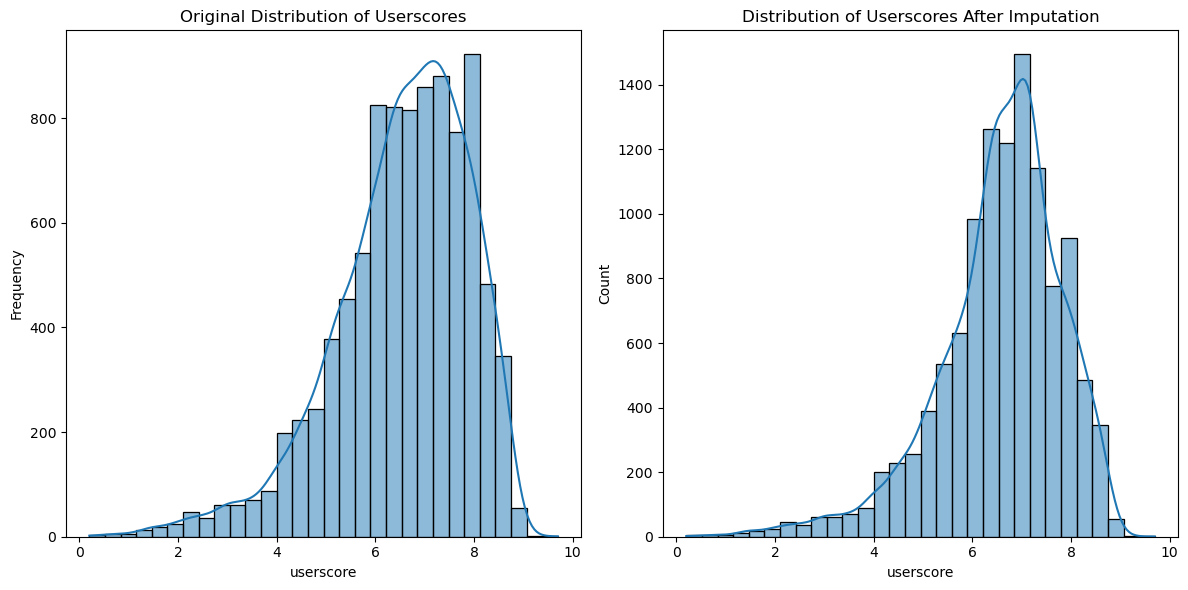

In [21]:
# Original data before filling missing values
original_data = movie_df['userscore'].dropna()

# Calculate the average userscore for each 'metascore' across all rows
userscore_mean = movie_df.groupby('metascore')['userscore'].mean()

def fill_missing_userscore(row):
    if pd.isna(row['userscore']):
        return userscore_mean.get(row['metascore'], row['userscore'])
    return row['userscore']

# Apply the function to fill missing age values
movie_df['userscore'] = movie_df.apply(fill_missing_userscore, axis=1)

# Data after filling missing values
imputed_data = movie_df['userscore']

# Setting up the plot
plt.figure(figsize=(12, 6))

# Plotting the original distribution (before imputation)
plt.subplot(1, 2, 1)
sns.histplot(original_data, bins=30, kde=True)
plt.title('Original Distribution of Userscores')
plt.xlabel('userscore')
plt.ylabel('Frequency')

# Plotting the distribution after imputation
plt.subplot(1, 2, 2)
sns.histplot(imputed_data, bins=30, kde=True)
plt.title('Distribution of Userscores After Imputation')
plt.xlabel('userscore')

plt.tight_layout()
plt.show()

The distribution after filling missing values doesn´t look exactly like before but it is still left skewed and looks similar.

In [22]:
# Checking for NaN values
movie_df.isnull().sum()

title        0
studio       0
rating       0
cast         0
director     0
genre        0
metascore    0
userscore    0
RelDate      0
dtype: int64

All missing values were filled.

## 1.2 Feature Engineering

From the RelDate feature, the age of the movie will be calculated.

In [23]:
from datetime import datetime

# Initialize an empty list to store ages
age = []

# Get the current year
current_year = datetime.now().year

# Looping through each date in the 'RelDate' column
for date in movie_df['RelDate']:
    # Extracting the year from the datetime object
    year = date.year
    
    # Calculate the age based on the extracted year
    age.append(current_year - year)

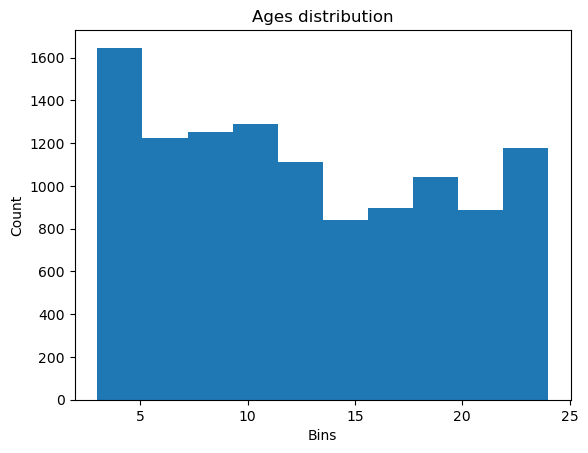

In [24]:
plt.hist(age)
plt.title("Ages distribution")
plt.xlabel("Bins")
plt.ylabel("Count")
plt.show()

In [25]:
# Assigning the calculated ages to a new column 
movie_df['Age'] = age

In [26]:
# Printing unique RelDate values
print(movie_df["RelDate"].unique())


<DatetimeArray>
['2011-06-01 00:00:00', '2016-03-11 00:00:00', '2006-12-01 00:00:00',
 '2012-09-14 00:00:00', '2013-06-28 00:00:00', '2017-01-13 00:00:00',
 '2014-10-24 00:00:00', '2008-03-07 00:00:00', '2015-07-10 00:00:00',
 '2015-05-08 00:00:00',
 ...
 '2016-01-01 00:00:00', '2003-09-24 00:00:00', '2020-06-09 00:00:00',
 '2010-09-22 00:00:00', '2004-01-07 00:00:00', '2021-03-18 00:00:00',
 '2011-02-16 00:00:00', '2003-08-03 00:00:00', '2002-07-10 00:00:00',
 '2005-10-04 00:00:00']
Length: 2083, dtype: datetime64[ns]


In [27]:
# Convert the 'RelDate' column to datetime format and extract the date
movie_df["RelDate"] = pd.to_datetime(movie_df["RelDate"]).dt.date

# Convert the 'RelDate' column to string format
movie_df["RelDate"] = movie_df["RelDate"].astype(str)

# Split the 'RelDate' column into separate columns for year, month, and day
movie_df[['year', 'RelMonth', 'day']] = movie_df["RelDate"].str.split("-", expand=True)


In [28]:
# Removing the 'RelDate', 'year' and 'day' columns
movie_df.drop(['RelDate', 'year','day'], inplace=True, axis=1)

In [29]:
# Checking the first few rows of the dataframe
movie_df.head()

,title,studio,rating,cast,director,genre,metascore,userscore,Age,RelMonth
0,!Women Art Revolution,Hotwire Productions,Not Rated,Unknown,Lynn Hershman-Leeson,Documentary,70,7.097753,13,06
1,10 Cloverfield Lane,Paramount Pictures,PG-13,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror",76,7.700000,8,03
2,10 Items or Less,Click Star,R,"Jonah Hill,Morgan Freeman,Paz Vega",Brad Silberling,"Drama,Comedy,Romance",54,5.800000,18,12
3,10 Years,Anchor Bay Entertainment,R,"Channing Tatum,Chris Pratt,Jenna Dewan",Jamie Linden,"Drama,Comedy,Romance",61,6.900000,12,09
4,100 Bloody Acres,Music Box Films,Not Rated,Unknown,Cameron Cairnes,"Horror,Comedy",63,7.500000,11,06


In [30]:
# Remove leading zero from 'RelMonth' column
movie_df['RelMonth'] = movie_df['RelMonth'].str.lstrip('0')

# Convert 'RelMonth' to numeric
movie_df['RelMonth'] = pd.to_numeric(movie_df['RelMonth'])

# Checking the first few rows of the dataframe
movie_df.head()

,title,studio,rating,cast,director,genre,metascore,userscore,Age,RelMonth
0,!Women Art Revolution,Hotwire Productions,Not Rated,Unknown,Lynn Hershman-Leeson,Documentary,70,7.097753,13,6
1,10 Cloverfield Lane,Paramount Pictures,PG-13,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror",76,7.700000,8,3
2,10 Items or Less,Click Star,R,"Jonah Hill,Morgan Freeman,Paz Vega",Brad Silberling,"Drama,Comedy,Romance",54,5.800000,18,12
3,10 Years,Anchor Bay Entertainment,R,"Channing Tatum,Chris Pratt,Jenna Dewan",Jamie Linden,"Drama,Comedy,Romance",61,6.900000,12,9
4,100 Bloody Acres,Music Box Films,Not Rated,Unknown,Cameron Cairnes,"Horror,Comedy",63,7.500000,11,6


In [31]:
# Count unique actor names in the 'cast' column
unique_actor_count = movie_df['cast'].str.split(', ').explode().nunique()

# Display the count of unique actor names
print("Number of unique actor names in the 'cast' column:", unique_actor_count)

Number of unique actor names in the 'cast' column: 7594


In [32]:
result = round((20 / 100) * 7594)
print(result)

1519


From the cast column, the 300 most appearing actors will be extracted and the amount of those actors per movie will be counted to create a new feature called "top_actors_count".

In [33]:
# Split the names by comma and create a list of names
actors = movie_df['cast'].str.split(', ')

# Create a dictionary to store the count of each name
actor_count = {}

# Iterate over each row and count the occurrence of each name
for row in actors:
    for actor in row:
        if actor != "Unknown":  # Exclude "Unknown"
            if actor in actor_count:
                actor_count[actor] += 1
            else:
                actor_count[actor] = 1

# Convert the dictionary to a dataframe
actor_df = pd.DataFrame.from_dict(actor_count, orient='index', columns=['Count'])

# Sort the dataframe by count in descending order
actor_df = actor_df.sort_values(by='Count', ascending=False)

# Get the top 10 names (excluding "Unknown")
top_names = actor_df[actor_df.index != "Unknown"].head(300).index.tolist()

# Create a new column with the count of top names in each row (excluding "Unknown")
movie_df['top_actors_count'] = movie_df['cast'].apply(lambda x: sum([1 for name in top_names if name in x and name != "Unknown"]))


In [34]:
# Printing unique RelDate values
print(movie_df["top_actors_count"].unique())

[0 1 2 3]


In [35]:
# Removing the 'cast' column
movie_df.drop(['cast'], inplace=True, axis=1)

## 1.3 EDA

In [36]:
# Checking the first few rows of the dataframe
movie_df.head()

,title,studio,rating,director,genre,metascore,userscore,Age,RelMonth,top_actors_count
0,!Women Art Revolution,Hotwire Productions,Not Rated,Lynn Hershman-Leeson,Documentary,70,7.097753,13,6,0
1,10 Cloverfield Lane,Paramount Pictures,PG-13,Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror",76,7.700000,8,3,1
2,10 Items or Less,Click Star,R,Brad Silberling,"Drama,Comedy,Romance",54,5.800000,18,12,0
3,10 Years,Anchor Bay Entertainment,R,Jamie Linden,"Drama,Comedy,Romance",61,6.900000,12,9,0
4,100 Bloody Acres,Music Box Films,Not Rated,Cameron Cairnes,"Horror,Comedy",63,7.500000,11,6,0


In [37]:
movie_df.nunique()

title               11145
studio               1119
rating                 14
director             6137
genre                1313
metascore              98
userscore             169
Age                    22
RelMonth               12
top_actors_count        4
dtype: int64

**title:** The title of the movie

**studio:** The studio that produced the movie.

**rating:** It´s showing the rating of the Motion Picture Association film rating system. It is meant to help parents and movie-goers decide which movie is suitable for their families and children. 

**director:** The director directing the movie.

**genre:** The genre of the movie

**metascore:** A diverse group of highly respected critics assigns scores to their movie reviews. The weighted average of those scores results in a single number, the Metascore.

**userscore:** The weighted average of the scores given by users of the Metacritic website.

**Age:** The age of the movie calculated from the release date of the movie to the current year.

**RelMonth:** The month in which the movie was released.

**top_actor_count:** The amount of top actors acting in a movie. The top actors were calculated by the amount of movies they were playing in of the dataset.



In [38]:
movie_df.describe()

,metascore,userscore,Age,RelMonth,top_actors_count
count,11364.000000,11364.000000,11364.000000,11364.000000,11364.000000
mean,58.392555,6.560911,12.672738,6.739880,0.096181
std,16.898457,1.262212,6.160372,3.321743,0.318664
min,1.000000,0.200000,3.000000,1.000000,0.000000
25%,47.000000,5.900000,7.000000,4.000000,0.000000
50%,60.000000,6.700000,12.000000,7.000000,0.000000
75%,71.000000,7.400000,18.000000,10.000000,0.000000
max,100.000000,9.700000,24.000000,12.000000,3.000000


In [39]:
# Defining the categorical columns
categorical_columns = ['studio', 'director']

# Extract the specified categorical columns from the DataFrame
categorical_description = movie_df[categorical_columns].describe()

# Print the basic statistics for each specified categorical column
print(categorical_description)

           studio           director
count       11364              11364
unique       1119               6137
top     IFC Films  Steven Soderbergh
freq          408                 23


**Conclusion:** 

There are 11364 studios and directors in total, whereby 1119 are unique studios and 6137 are unique directors. The most frequent studio is IFC Films with 408 appearences in the dataset. The most frequent director is Steven Soderbergh with 23 appearances.

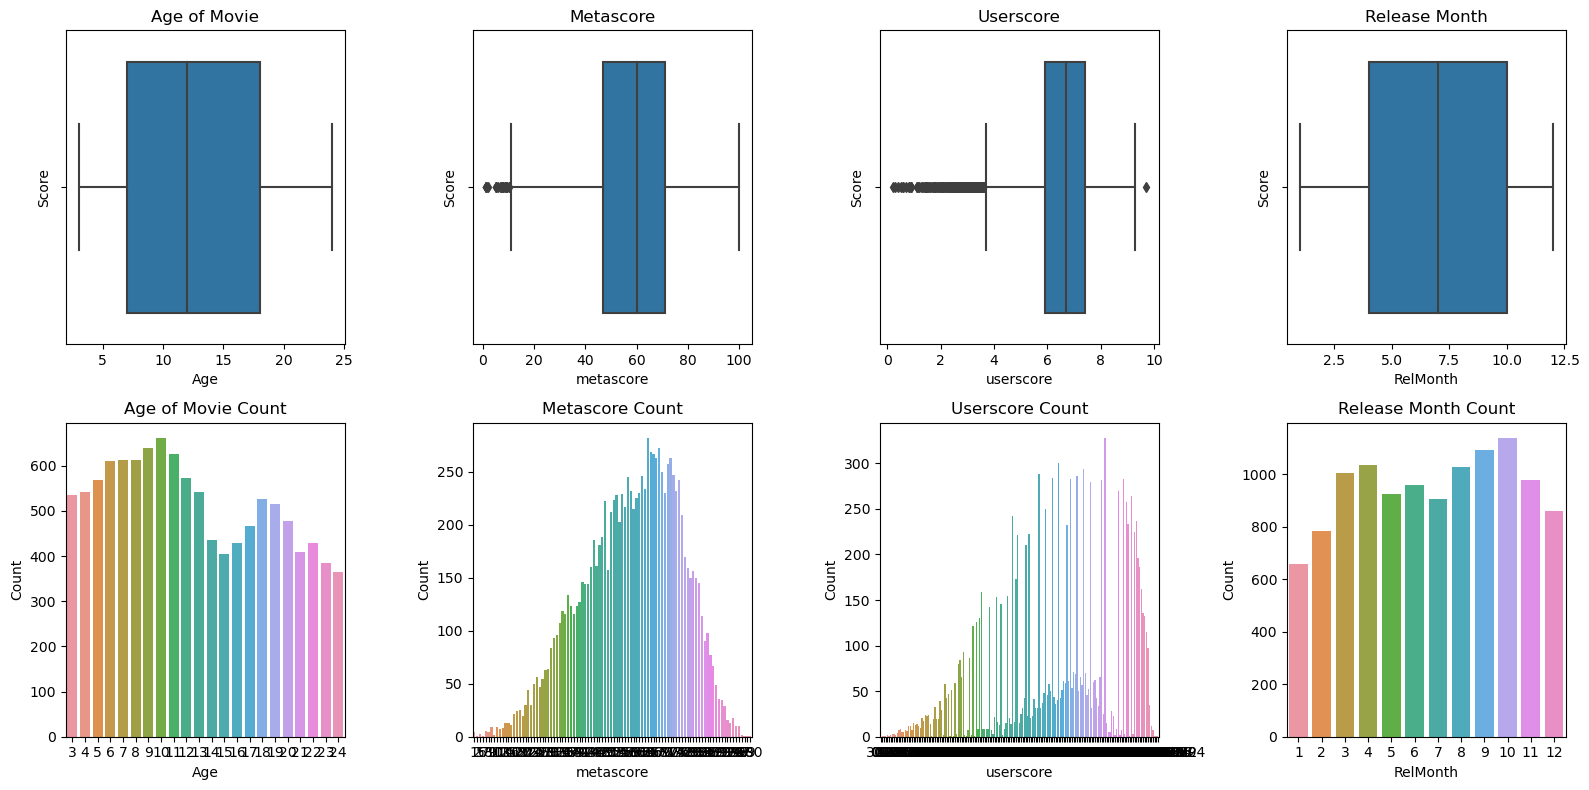

In [41]:
# Define the columns to plot and their titles
columns_to_plot = ['Age', 'metascore', 'userscore', 'RelMonth']
titles = ['Age of Movie', 'Metascore', 'Userscore', 'Release Month']

# Set up subplots for box plots
plt.figure(figsize=(16, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=movie_df[column])
    plt.title(titles[i - 1])
    plt.xlabel(column)
    plt.ylabel('Score')

# Set up subplots for bar plots
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 4, i + 4)
    sns.countplot(x=movie_df[column])
    plt.title(titles[i - 1] + ' Count')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Conclusion: There are some outliers in the meterscore and userscore columns.

As the userscore only has a small range from the lowest to the highest scores, the outliers will therfore be kept. The outliers of the metascore column shown on the box plot will be removed as there is a higher range and the outliers seem to be an exception from the norm. 

The metascore is quite normally distributed, and the usercore a bit left skewed. Age and RelMonth are bimodal distributions with 2 peaks. Those 2 don´t have outliers.

In [42]:
# Get the shape of the DataFrame
data_size = movie_df.shape

# Extract the number of rows and columns
num_rows, num_columns = data_size

# Print or use the size information as needed
print("Number of rows:", num_rows)

Number of rows: 11364


In [43]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = movie_df['metascore'].quantile(0.25)
Q3 = movie_df['metascore'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using the bounds
outliers = movie_df[(movie_df['metascore'] < lower_bound) | (movie_df['metascore'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

# Print or use the count as needed
print("Number of outliers in Profit:", num_outliers)

# Calculate the percentage of outliers
percentage_outliers = (len(outliers) / len(movie_df)) * 100

# Print or use the percentage as needed
print("Percentage of outliers in Profit: {:.2f}%".format(percentage_outliers))

Number of outliers in Profit: 29
Percentage of outliers in Profit: 0.26%


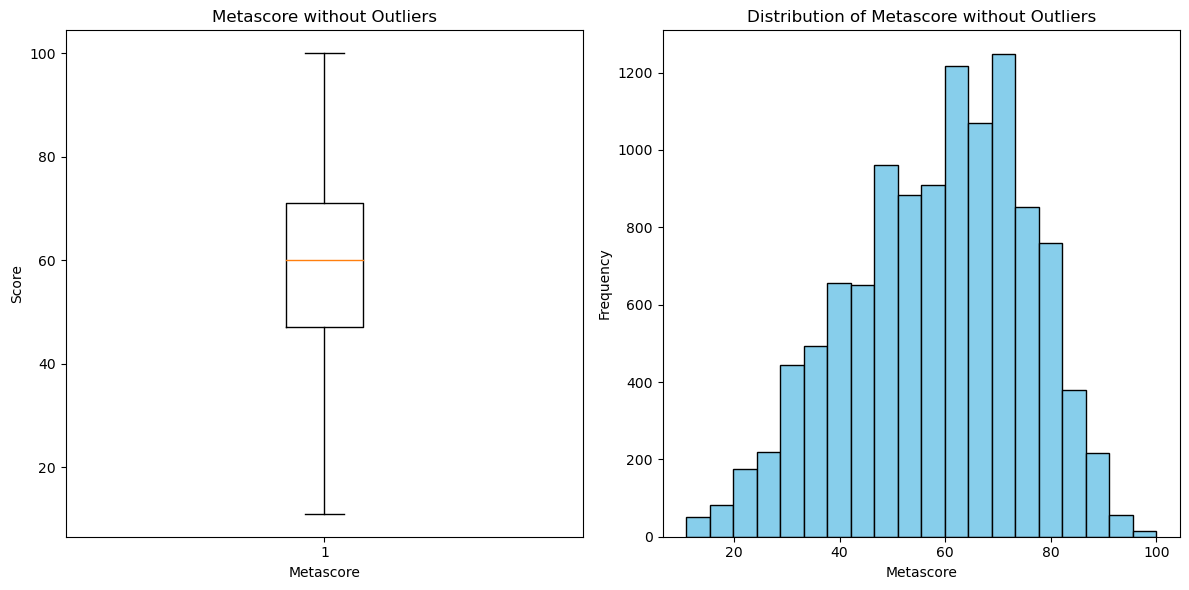

In [59]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot boxplot without outliers
axes[0].boxplot(movie_df_no_outliers['metascore'])
axes[0].set_title('Metascore without Outliers')
axes[0].set_xlabel('Metascore')
axes[0].set_ylabel('Score')

# Plot bar plot of the distribution
axes[1].hist(movie_df_no_outliers['metascore'], bins=20, color='skyblue', edgecolor='black')
axes[1].set_title('Distribution of Metascore without Outliers')
axes[1].set_xlabel('Metascore')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Now all outliers are removed.

In [45]:
# Saving the DataFrame as a CSV file
csv_file = r"c:\Users\leath\Documents\AUAS\0. Completed\7. AI Methods in Business\Resit\Movie_Cleaned.csv"
movie_df.to_csv(csv_file, index=False)

print(f"CSV file '{csv_file}' has been created.")

CSV file 'c:\Users\leath\Documents\AUAS\0. Completed\7. AI Methods in Business\Resit\Movie_Cleaned.csv' has been created.


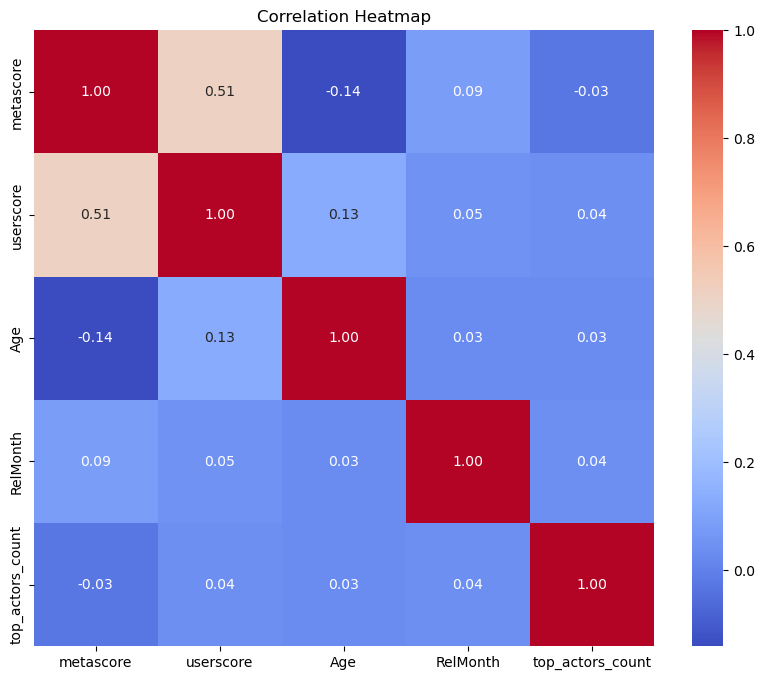

In [46]:
# Select numerical columns only
numerical_columns = movie_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numerical columns
corr = movie_df[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Conclusion:** We can see from this correlation heatmap that userscore and metascore are the highest correlated variables with 0.51. They have a positive moderate correlation. Rating and Age have a positive weak correlation with 0.2. All other variables have a very week correlation.

### User- and metascore per Release Month


Average scores by RelMonth:
    RelMonth  metascore  userscore
0          1  54.488619   6.359879
1          2  55.442455   6.422344
2          3  58.008946   6.631031
3          4  56.958414   6.531826
4          5  58.664865   6.542294
5          6  59.500000   6.581439
6          7  59.525967   6.591329
7          8  57.336257   6.523281
8          9  58.021082   6.466113
9         10  59.127305   6.615686
10        11  61.294479   6.693754
11        12  60.975610   6.700428


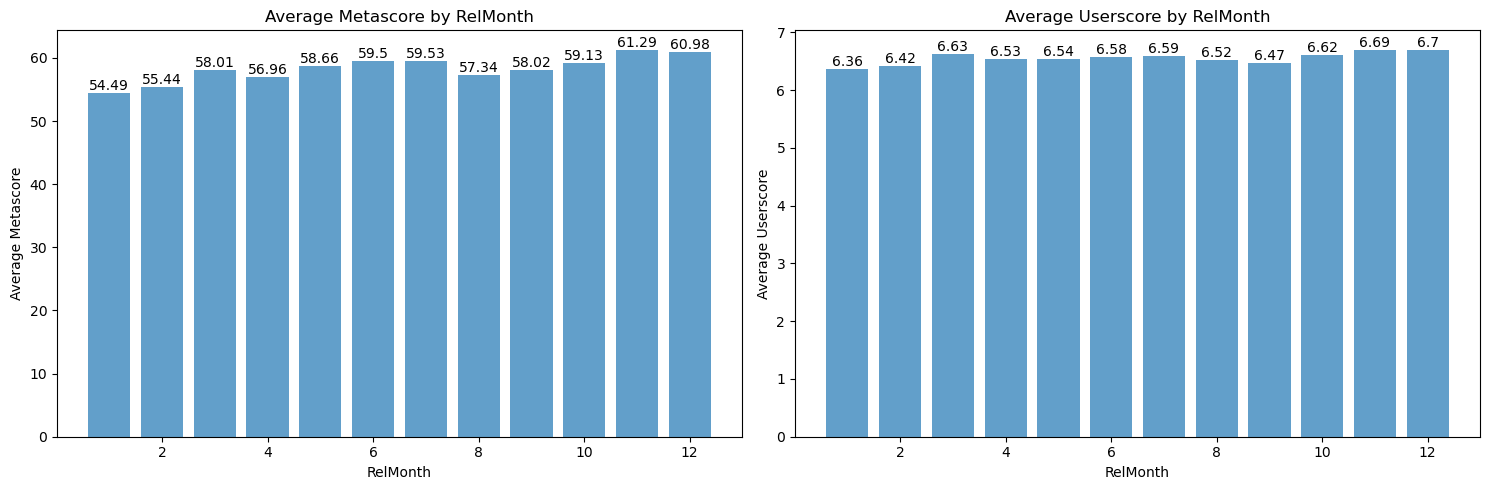

In [47]:
# Group by RelMonth and calculate the average scores
rel_month_avg = movie_df.groupby('RelMonth').agg({
    'metascore': 'mean',
    'userscore': 'mean'
}).reset_index()

print("\nAverage scores by RelMonth:")
print(rel_month_avg)

# Set up subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot average metascore by RelMonth with labels
bars1 = axes[0].bar(rel_month_avg['RelMonth'], rel_month_avg['metascore'], alpha=0.7)
axes[0].set_xlabel('RelMonth')
axes[0].set_ylabel('Average Metascore')
axes[0].set_title('Average Metascore by RelMonth')

# Add labels with numbers on the bars
for bar in bars1:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Plot average userscore by RelMonth with labels
bars2 = axes[1].bar(rel_month_avg['RelMonth'], rel_month_avg['userscore'], alpha=0.7)
axes[1].set_xlabel('RelMonth')
axes[1].set_ylabel('Average Userscore')
axes[1].set_title('Average Userscore by RelMonth')

# Add labels with numbers on the bars
for bar in bars2:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**Conclusion:** On average movies released in the month of November have the highest metascore. Movies released in December have on average the highest userscore. Movies released in January have the lowest meta- and userscore.

### User- and metascore per Amount of Top Actors in a movie


Average scores by top_actor_count:
   top_actors_count  metascore  userscore
0                 0  58.561009   6.546429
1                 1  56.417735   6.691778
2                 2  59.851351   6.947297
3                 3  57.333333   6.166667


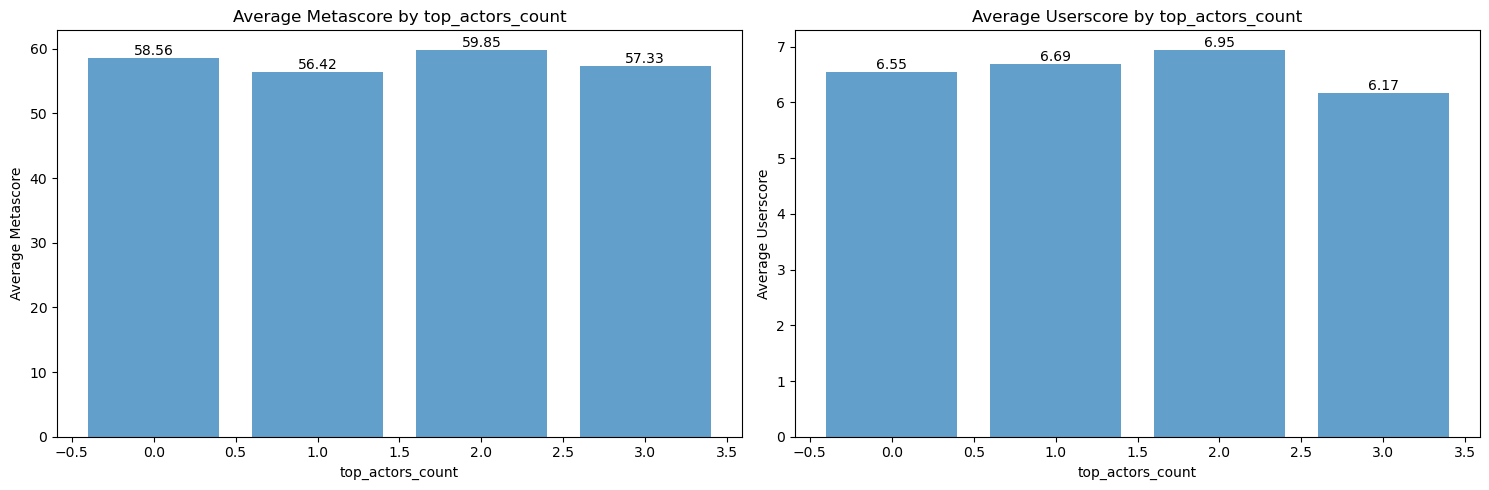

In [48]:
# Group by top_actor_count and calculate the average scores
actor_count_avg = movie_df.groupby('top_actors_count').agg({
    'metascore': 'mean',
    'userscore': 'mean'
}).reset_index()

print("\nAverage scores by top_actor_count:")
print(actor_count_avg)

# Set up subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot average metascore by top_actors_count
bars1 = axes[0].bar(actor_count_avg['top_actors_count'], actor_count_avg['metascore'], alpha=0.7)
axes[0].set_xlabel('top_actors_count')
axes[0].set_ylabel('Average Metascore')
axes[0].set_title('Average Metascore by top_actors_count')

# Add labels with numbers on the bars
for bar in bars1:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Plot average userscore by top_actors_count 
bars2 = axes[1].bar(actor_count_avg['top_actors_count'], actor_count_avg['userscore'], alpha=0.7)
axes[1].set_xlabel('top_actors_count')
axes[1].set_ylabel('Average Userscore')
axes[1].set_title('Average Userscore by top_actors_count')

# Add labels with numbers on the bars
for bar in bars2:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**Conclusion:** Movies with 3 top actors have the highest metascore but the lowest userscore on average. The movies with only one top actor have on average the highest userscore. The lowest metascore have on average movies with 2 top actors. Nevertheless, the scores are really similar between number of top actors.

### Top 10 movies based on metascore 

In [49]:
# Get the top 10 movies based on metascore
top_10_metascore = movie_df.nlargest(10, 'metascore')

# Display the result
print(top_10_metascore)

                             title                    studio      rating  \
1477                       Boyhood                 IFC Films           R   
5713                     Moonlight                       A24   Not Rated   
6360               Pan's Labyrinth              Picturehouse           R   
114   4 Months, 3 Weeks and 2 Days                 IFC Films   Not Rated   
6788              Quo Vadis, Aida?                  CinÃ©art    Approved   
23                12 Years a Slave  Fox Searchlight Pictures           R   
1868   Children of Paradise (1945)                 Tricolore   Not Rated   
3572                       Gravity     Warner Bros. Pictures       PG-13   
4695               Killer of Sheep    Milestone Film & Video   Not Rated   
5350         Manchester by the Sea      Roadside Attractions           R   

                director                               genre  metascore  \
1477   Richard Linklater                               Drama        100   
5713       Ba

**Conclusion:** The genre "Drama" is mentioned in all top 10 movies. The studio IFC Films is mentioned twice in the top 10. No director is appearing multiple times in the top 10. Most movies in the top 10 don´t have any of the top actors. Only in 2 movies, one top actor is acting in them. It could be concluded that a high amount of top actors don´t play a role in good scoring. 3 movies from the top 10 were released in March and another 3 in October. the youngest movie in the top 10 is 3 and the oldest is 18.

### Top 10 movies based on userscore 

In [50]:
# Get the top 10 movies based on userscore
top_10_userscore = movie_df.nlargest(10, 'userscore')

# Display the result
print(top_10_userscore)

                                                   title  \
6710                                             Promare   
10668                                          Unplanned   
9316   The Lord of the Rings: The Fellowship of the Ring   
1933                                         City of God   
4540                                               Joker   
5619                                      Miss Americana   
7705                                       Spirited Away   
8565                                     The Dark Knight   
9317       The Lord of the Rings: The Return of the King   
9318               The Lord of the Rings: The Two Towers   

                        studio      rating            director  \
6710                     GKIDS   Not Rated    Hiroyuki Imaishi   
10668  Pure Flix Entertainment           R        Cary Solomon   
9316           New Line Cinema       PG-13       Peter Jackson   
1933             Miramax Films           R  Fernando Meirelles   
4540     

**Conclusion:** The top ten movies based on metascore are different to the top ten movies based on the userscore. The studio New Line Cinema appears 3 times in the top 10, together with the director Peter Jackson. Different to the metascors, for the userscores, the genre Drama doesn´t play such a big role. The genres Action and Adventure therefore appear more often, in around 7 of the 10 top movies. Also here, most movies have a top actors count of 0. 3 movies were released in December that appear in the top 10. Best rated movies by userscore are either 4 or 5 years old or at least 16 and up to 23.


### 10 movies with lowest metascore

In [51]:
# Get the 10 movies with lowest metascore
low_10_metascore = movie_df.nsmallest(10, 'metascore')

# Display the result
print(low_10_metascore)

                                                   title  \
1806                                               Chaos   
2345                                   Death of a Nation   
9835                                  The Singing Forest   
10655                                    United Passions   
3867   Hillary's America: The Secret History of the D...   
7879                                           Strippers   
9039            The Human Centipede III (Final Sequence)   
10809                                             Vulgar   
5926                     National Lampoon's Gold Diggers   
3606                          Grizzly II: Revenge (1983)   

                         studio      rating             director  \
1806         Dinsdale Releasing   Not Rated        David DeFalco   
2345   Pure Flix / Quality Flix       PG-13       Bruce Schooley   
9835     Hollywood Independents   Not Rated          Jorge Ameer   
10655        Screen Media Films   Not Rated  FrÃ©dÃ©ric Auburtin   

### 10 movies with lowest userscore

In [52]:
# Get the 10 movies with lowest userscore
low_10_userscore = movie_df.nsmallest(10, 'userscore')

# Display the result
print(low_10_userscore)

                               title                                  studio  \
10669                     Unpregnant                                 HBO Max   
1804               Changing the Game                                    Hulu   
3306                       Funny Boy                         ARRAY Releasing   
4757            Knock Down the House                                 Netflix   
3006                           Fauci                       Magnolia Pictures   
10728                       Vanquish                               Lionsgate   
10655                United Passions                      Screen Media Films   
5963   Never Rarely Sometimes Always                          Focus Features   
9526                       The Order  Twentieth Century Fox Film Corporation   
678                     Among Ravens                       Gravitas Ventures   

           rating               director                           genre  \
10669       PG-13  Rachel Lee Goldenberg   

### Top 10 directors based on metascore and userscore

C:\Users\leath\AppData\Local\Temp\ipykernel_1228\940853922.py:34: UserWarning: Glyph 148 (\x94) missing from current font.
C:\Users\leath\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 148 (\x94) missing from current font.


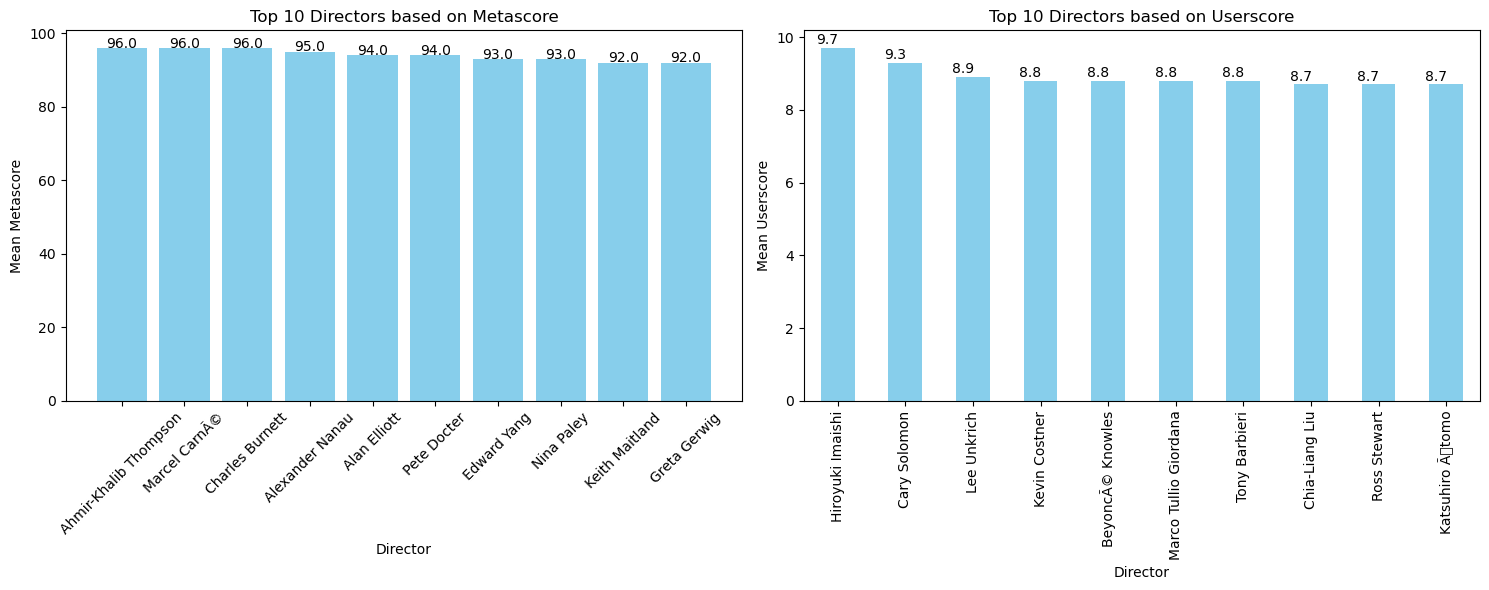

In [53]:
# Group by Director and calculate the mean Metascore for each director
director_metascore_mean = movie_df.groupby('director')['metascore'].mean().sort_values(ascending=False)

# Get the top 10 directors
top_10_directors = director_metascore_mean.head(10)

# Group by Director and calculate the mean Userscore for each director
director_userscore_mean = movie_df.groupby('director')['userscore'].mean().sort_values(ascending=False)

# Get the top 10 directors
top_10_directors_userscore = director_userscore_mean.head(10)

# Set up subplots with 1 row and 2 columns for Directors
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Top 10 Directors based on Metascore
axes[0].bar(top_10_directors.index, top_10_directors.values, color='skyblue')
axes[0].set_title('Top 10 Directors based on Metascore')
axes[0].set_xlabel('Director')
axes[0].set_ylabel('Mean Metascore')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
for i, score in enumerate(top_10_directors):
    axes[0].text(i, score + 0.1, str(round(score, 2)), ha='center')

# Top 10 Directors based on Userscore
bars = top_10_directors_userscore.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Top 10 Directors based on Userscore')
axes[1].set_xlabel('Director')
axes[1].set_ylabel('Mean Userscore')
for bar, score in zip(bars.patches, top_10_directors_userscore):
    axes[1].text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, str(round(score, 2)), ha='center')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Conclusion:** The top 10 directors are different when comparing userscores and metascores. Therefore critics evalute movies differently than users. What critics perceive as good movie doesn´t have to be a good movie from the perspective of a user.

### Top 10 Movie ages based on metascore and userscore

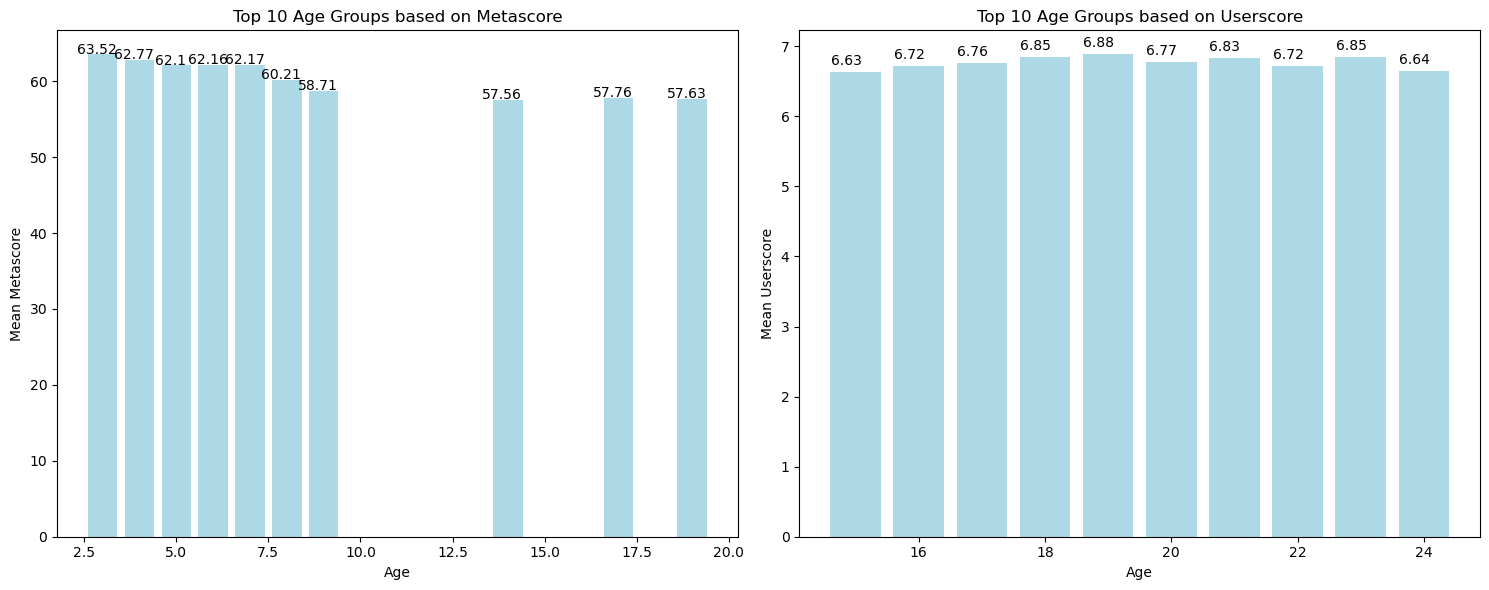

In [54]:
# Group by Age and calculate the mean Metascore for each age group
age_metascore_mean = movie_df.groupby('Age')['metascore'].mean().sort_values(ascending=False)

# Get the top 10 age groups
top_10_ages_metascore = age_metascore_mean.head(10)

# Group by Age and calculate the mean Userscore for each age group
age_userscore_mean = movie_df.groupby('Age')['userscore'].mean().sort_values(ascending=False)

# Get the top 10 age groups
top_10_ages_userscore = age_userscore_mean.head(10)

# Set up subplots with 1 row and 2 columns for Age Groups
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Top 10 Age Groups based on Metascore
bars = axes[0].bar(list(top_10_ages_metascore.index), top_10_ages_metascore, color='lightblue')  # Corrected line
axes[0].set_title('Top 10 Age Groups based on Metascore')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Mean Metascore')
for bar, score in zip(bars, top_10_ages_metascore):
    axes[0].text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, str(round(score, 2)), ha='center')  # Corrected line

# Top 10 Age Groups based on Userscore
bars = axes[1].bar(list(top_10_ages_userscore.index), top_10_ages_userscore, color='lightblue')  # Corrected line
axes[1].set_title('Top 10 Age Groups based on Userscore')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Mean Userscore')
for bar, score in zip(bars, top_10_ages_userscore):
    axes[1].text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, str(round(score, 2)), ha='center')  # Corrected line

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**Conclusion:** Also, the distrubution of ages of the top 10 movies are different from metascore and userscore. Critics tend to rate movies higher that are younger (more recently published) with an age ranging from 2.5 to 9 years. The older movies are the lower their metascore on average usually is. The oldest movie age in the top 10 is around 19 with an average metascore of 63.52. The top 10 movie ages for userscores start at 15 and range to 24. The movie age with the on average highest userscore is 19 with a 6.88.

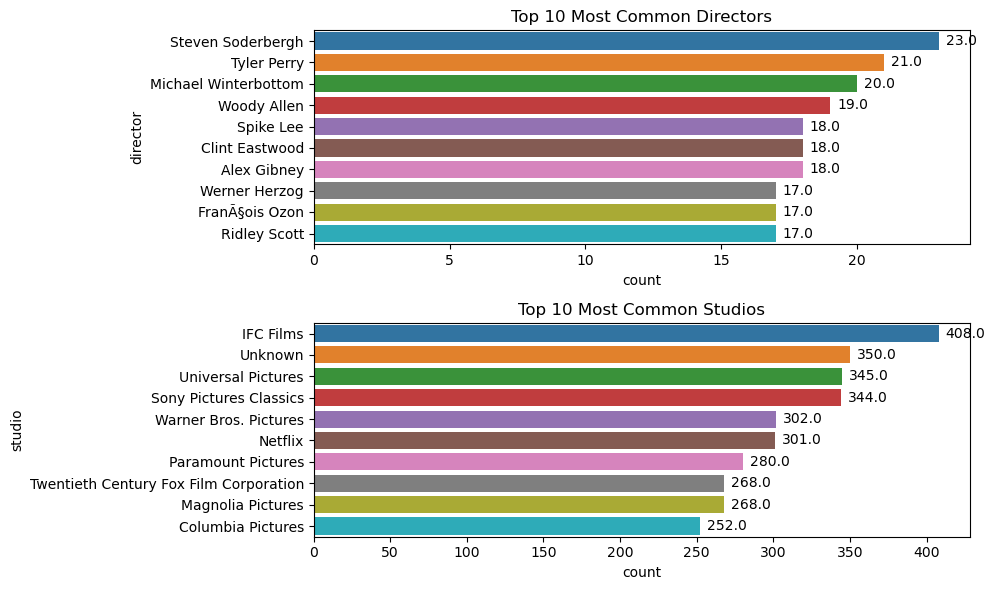

In [55]:
# Calculate the top 10 directors based on count
top_10_director_count = movie_df['director'].value_counts().head(10)

# Calculate the top 10 studios
top_10_studios = movie_df['studio'].value_counts().head(10)

# Set up subplots with 2 rows and 1 column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))  

# Plotting the most common directors with value labels (Top 10)
axes[0].set_title('Top 10 Most Common Directors')
ax1 = sns.countplot(y='director', data=movie_df, order=top_10_director_count.index, ax=axes[0])

# Add value labels on the bars for directors
for p in ax1.patches:
    ax1.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Plotting the most common studios with value labels (Top 10)
axes[1].set_title('Top 10 Most Common Studios')
ax2 = sns.countplot(y='studio', data=movie_df, order=top_10_studios.index, ax=axes[1])

# Add value labels on the bars for studios
for p in ax2.patches:
    ax2.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Comclusion: 

The most common director is Steven Sonderbergh who appears 23 times in the dataset. From the previous graphs you can see, that he still doesn´t appear in the top 10 directors. The 10th most common director is Ridley Scott who appears 17 times.

The most common studio is IFC Films with 408 appearences. The 10th most common studio is Columbia Prictures with 252 appearances.

